# Business Understanding

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

# Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# Missing Value Screening

print("Number of Missing Values in Each Category:")
print(df.isna().sum())

Number of Missing Values in Each Category:
enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


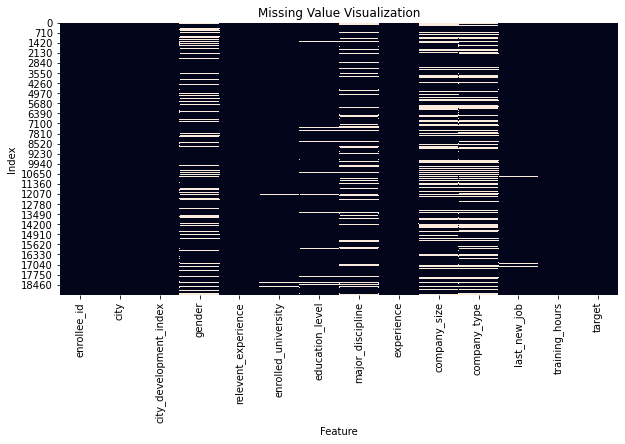

In [5]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value Visualization')

plt.show()

In [6]:
# Imbalance Dataset Checking

df['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

C:\Users\user\miniconda3\envs\defiska\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


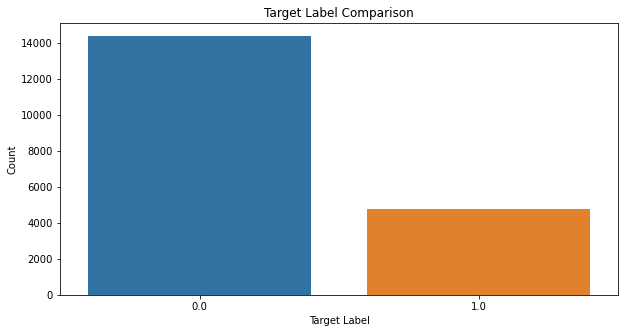

In [7]:
plt.subplots(figsize=(10,5))
sns.countplot(df['target'])
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Target Label Comparison')

plt.show()

# Data Preparation

## Extract City Code 

In [8]:
def city_code(x):
    y = x.str.split("_",expand=True)[1].astype('int64')
    return y

In [9]:
df['city'] = city_code(df['city'])

In [10]:
df.head()

enrollee_id  city  city_development_index gender      relevent_experience  \
0         8949   103                   0.920   Male  Has relevent experience   
1        29725    40                   0.776   Male   No relevent experience   
2        11561    21                   0.624    NaN   No relevent experience   
3        33241   115                   0.789    NaN   No relevent experience   
4          666   162                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3                 NaN        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN            1              36     1.0  
1        50-99         Pvt Ltd           >4              47     0.0  
2          NaN             NaN        never              83     0.0  
3          NaN         Pvt Ltd        never              52     1.0  
4        50-99  Funded Startup            4               8     0.0

## Missing Value Treatment

In [11]:
def null_fill(x):
    return x.fillna('Unknown',inplace=True)

In [12]:
null_fill(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  int64  
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

## Encoding

In [13]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
ord_pipe = Pipeline([
    ('ord_encode',OrdinalEncoder([
                                    ['Unknown', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
                                    'Unknown,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
                                    ['Unknown','<10', '10/49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
                                    ['Unknown','1', '2', '3', '4', '>4', 'never']
                                ]))
])

C:\Users\user\miniconda3\envs\defiska\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass categories=[['Unknown', 'Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], ['Unknown', '<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'], ['Unknown', '<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+'], ['Unknown', '1', '2', '3', '4', '>4', 'never']] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [15]:
ord_column = ['education_level','experience','company_size','last_new_job']
card_column = ['gender','relevent_experience','enrolled_university','major_discipline','company_type'] 

In [16]:
def encoder(df,ord_column,card_column):
    ord_pipe.fit(df[ord_column])
    df[ord_column] = ord_pipe.transform(df[ord_column])
    df = pd.get_dummies(df,columns=card_column)
    return df

In [17]:
df = encoder(df,ord_column,card_column)

In [18]:
df.head()

enrollee_id  city  city_development_index  education_level  experience  \
0         8949   103                   0.920              3.0        22.0   
1        29725    40                   0.776              3.0        16.0   
2        11561    21                   0.624              3.0         6.0   
3        33241   115                   0.789              3.0         1.0   
4          666   162                   0.767              4.0        22.0   

   company_size  last_new_job  training_hours  target  gender_Female  ...  \
0           0.0           1.0              36     1.0              0  ...   
1           3.0           5.0              47     0.0              0  ...   
2           0.0           6.0              83     0.0              0  ...   
3           0.0           6.0              52     1.0              0  ...   
4           3.0           4.0               8     0.0              0  ...   

   major_discipline_Other  major_discipline_STEM  major_discipline_Unknown  \
0                       0                      1                         0   
1                       0                      1                         0   
2                       0                      1                         0   
3                       0                      0                         0   
4                       0                      1                         0   

   company_type_Early Stage Startup  company_type_Funded Startup  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            1   

   company_type_NGO  company_type_Other  company_type_Public Sector  \
0                 0                   0                           0   
1                 0                   0                           0   
2                 0                   0                           0   
3                 0                   0                           0   
4                 0                   0                           0   

   company_type_Pvt Ltd  company_type_Unknown  
0                     0                     1  
1                     1                     0  
2                     0                     1  
3                     1                     0  
4                     0                     0  

[5 rows x 33 columns]

## Balancing Dataset 

In [19]:
X = df.drop(columns=['enrollee_id','target'])
y = df.target

In [20]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [21]:
# Fungsi
def balancing(X,y,smote_ratio,rus_ratio):
    smote = SMOTE(sampling_strategy=smote_ratio)
    X_sm, y_sm = smote.fit_sample(X, y)
    rus = RandomUnderSampler(sampling_strategy=rus_ratio)
    X, y = rus.fit_sample(X_sm,y_sm)
    return X,y

In [22]:
X,y = balancing(X,y,1,1)

In [23]:
y.value_counts()

1.0    14381
0.0    14381
Name: target, dtype: int64

C:\Users\user\miniconda3\envs\defiska\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


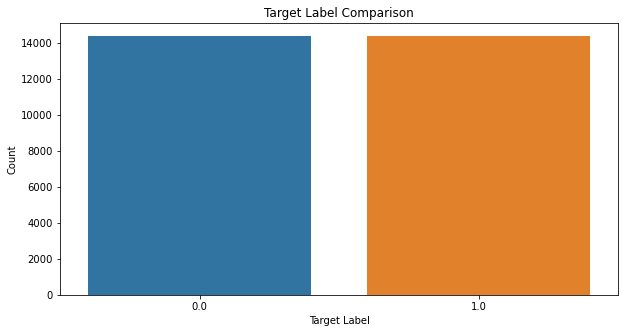

In [24]:
plt.subplots(figsize=(10,5))
sns.countplot(y)
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.title('Target Label Comparison')

plt.show()

## Feature Selection

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

In [26]:
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]

In [27]:
X_new.columns

Index(['city', 'city_development_index', 'experience', 'company_size',
       'gender_Male', 'relevent_experience_Has relevent experience',
       'enrolled_university_no_enrollment', 'major_discipline_Unknown',
       'company_type_Pvt Ltd', 'company_type_Unknown'],
      dtype='object')

In [28]:
X_new.head()

city  city_development_index  experience  company_size  gender_Male  \
0    40                   0.776        16.0           3.0            1   
1    21                   0.624         6.0           0.0            0   
2   162                   0.767        22.0           3.0            1   
3   160                   0.920         6.0           3.0            1   
4   103                   0.920        18.0           8.0            0   

   relevent_experience_Has relevent experience  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

   enrolled_university_no_enrollment  major_discipline_Unknown  \
0                                  1                         0   
1                                  0                         0   
2                                  1                         0   
3                                  1                         1   
4                                  1                         0   

   company_type_Pvt Ltd  company_type_Unknown  
0                     1                     0  
1                     0                     1  
2                     0                     0  
3                     0                     0  
4                     1                     0

# Modeling

## Dataset Splitting 

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23009, 10), (5753, 10), (23009,), (5753,))

## Numerical Feature Treatment

In [31]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [32]:
num_pipe = Pipeline([
    ('scaler',StandardScaler())
])

In [33]:
num_column = ['city','city_development_index']

In [34]:
def transform_scaling(X,num_column):
    num_pipe.fit(X[num_column])
    X[num_column] = num_pipe.transform(X[num_column])
    return X

In [35]:
X_train = transform_scaling(X_train,num_column)
X_test = transform_scaling(X_test,num_column)

<ipython-input-34-a249653aa442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_column] = num_pipe.transform(X[num_column])
C:\Users\user\miniconda3\envs\defiska\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-34-a249653aa442>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [36]:
X_train.head()

city  city_development_index  experience  company_size  \
13437  0.565201                0.876430         9.0           4.0   
1359  -0.233413               -0.013478        10.0           4.0   
19763 -1.032026                0.333435         9.0           0.0   
13799  0.565201                0.876430         4.0           0.0   
5955   0.796378                0.921679         2.0           4.0   

       gender_Male  relevent_experience_Has relevent experience  \
13437            0                                            1   
1359             1                                            0   
19763            1                                            0   
13799            0                                            0   
5955             0                                            0   

       enrolled_university_no_enrollment  major_discipline_Unknown  \
13437                                  1                         0   
1359                                   0                         0   
19763                                  1                         0   
13799                                  0                         0   
5955                                   0                         1   

       company_type_Pvt Ltd  company_type_Unknown  
13437                     1                     0  
1359                      1                     0  
19763                     1                     0  
13799                     1                     0  
5955                      0                     0

## Model Selection 

In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [38]:
models = Pipeline([
    ('clf', None), 
])

search = GridSearchCV(
    models, 
    cv=3, 
    return_train_score=False, 
    scoring=['accuracy', 'recall', 'f1'],
    refit = 'f1',
    param_grid={
        'clf': [GaussianNB(), RandomForestClassifier(), LogisticRegression(), XGBClassifier()]        
})

In [39]:
search.fit(X_train,y_train)

print('Best model:', search.best_params_)
model_comparison = pd.DataFrame(search.cv_results_)
model_comparison

C:\Users\user\miniconda3\envs\defiska\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.024515      0.015626         0.022440        0.006432   
1       2.087162      0.286290         0.313126        0.018161   
2       0.218884      0.153019         0.023550        0.004846   
3       0.922676      0.014732         0.047558        0.003748   

                                           param_clf  \
0                                       GaussianNB()   
1                           RandomForestClassifier()   
2                               LogisticRegression()   
3  XGBClassifier(base_score=None, booster=None, c...   

                                              params  split0_test_accuracy  \
0                              {'clf': GaussianNB()}              0.745241   
1                  {'clf': RandomForestClassifier()}              0.813950   
2                      {'clf': LogisticRegression()}              0.753194   
3  {'clf': XGBClassifier(base_score=None, booster...              0.861278   

   split1_test_accuracy  split2_test_accuracy  mean_test_accuracy  ...  \
0              0.750456              0.752901            0.749533  ...   
1              0.811213              0.811579            0.812247  ...   
2              0.751630              0.759030            0.754618  ...   
3              0.855150              0.858391            0.858273  ...   

   split2_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0            0.743802          0.745783         0.003127                 4   
1            0.794421          0.801851         0.005886                 2   
2            0.754132          0.756990         0.002056                 3   
3            0.859246          0.861625         0.003605                 1   

   split0_test_f1  split1_test_f1  split2_test_f1  mean_test_f1  std_test_f1  \
0        0.744709        0.748621        0.752449      0.748593     0.003160   
1        0.812951        0.808059        0.809793      0.810268     0.002025   
2        0.754315        0.751662        0.759625      0.755201     0.003311   
3        0.861997        0.854524        0.859690      0.858737     0.003124   

   rank_test_f1  
0             4  
1             2  
2             3  
3             1  

[4 rows x 24 columns]

C:\Users\user\miniconda3\envs\defiska\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


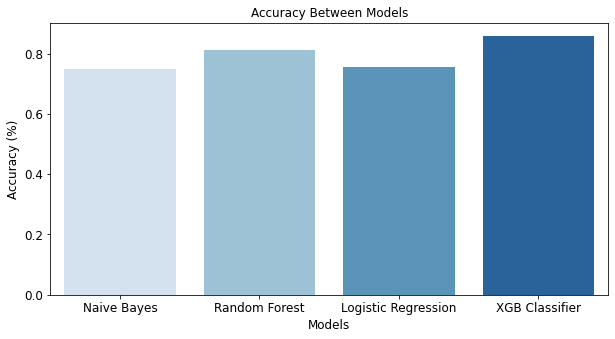

In [40]:
model_comparison['model'] = ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'XGB Classifier']

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot('model', 'mean_test_accuracy', data=model_comparison, capsize=.05, palette='Blues', ci=None)
ax.set_xlabel("Models",fontsize=12)
ax.set_ylabel("Accuracy (%)",fontsize=12)
ax.tick_params(labelsize=12)
ax.axes.set_title("Accuracy Between Models", fontsize=12)

plt.show()

## Hyperparameter Tuning 

In [56]:
param_xgb = {
    'max_depth':np.arange(1,4),
    'n_estimators':np.arange(169,171),
    'gamma':np.arange(8,11),
    'reg_alpha':np.linspace(0.33,0.34,100),
    'reg_lambda':np.linspace(0.15,0.16,100)
}

model_selected = XGBClassifier(n_jobs=-1,random_state=42)

In [57]:
model_xgb = RandomizedSearchCV(model_selected,param_xgb,cv=3,n_iter=100,n_jobs=-1,verbose=1,random_state=42)
model_xgb.fit(X_train,y_train)

print(model_xgb.best_params_)
print("Train data accuracy score: ", model_xgb.score(X_train,y_train))
print("Test data accuracy score: ", model_xgb.score(X_test,y_test))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\user\miniconda3\envs\defiska\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished
C:\Users\user\miniconda3\envs\defiska\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)

[09:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'reg_lambda': 0.15797979797979797, 'reg_alpha': 0.3398989898989899, 'n_estimators': 170, 'max_depth': 3, 'gamma': 9}
Train data accuracy score:  0.8548394106653918
Test data accuracy score:  0.8350425864766209


# Evaluation

In [58]:
from sklearn.metrics import plot_confusion_matrix, classification_report, roc_auc_score, roc_curve

In [59]:
y_pred = model_xgb.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix (Normalized)')

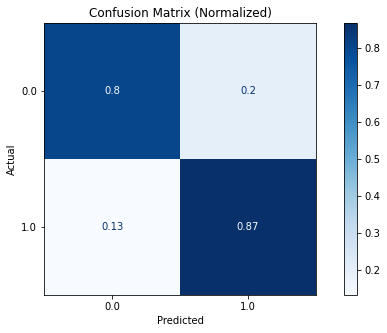

In [60]:
# Confusion Matrix

fig,ax = plt.subplots(figsize=(10,5))
plot_confusion_matrix(model_xgb,X_test,y_test,cmap=plt.cm.Blues,normalize='true',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix (Normalized)')

In [61]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      2877
         1.0       0.81      0.87      0.84      2876

    accuracy                           0.84      5753
   macro avg       0.84      0.84      0.83      5753
weighted avg       0.84      0.84      0.83      5753



In [62]:
# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score is",roc_auc)

ROC-AUC score is 0.8350482919785378


In [63]:
y_pred_proba = model_xgb.predict_proba(X_test)

In [64]:
a = [i[1] for i in y_pred_proba]

In [65]:
fpr,tpr,_ = roc_curve(y_test, a)

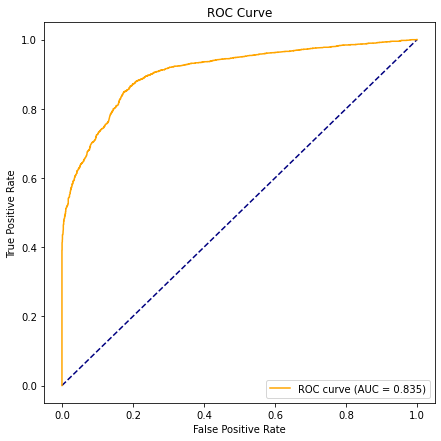

In [67]:
fig = plt.subplots(figsize=(7,7))

plt.plot([0, 1],[0, 1],color='navy',linestyle='--')
plt.plot(fpr,tpr,color='orange',label='ROC curve (AUC = {})'.format(round(roc_auc,3)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')

plt.show()

# Prediction

In [68]:
df_test = pd.read_csv('aug_test.csv')
df_test.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10          NaN            1   
1             STEM          5          NaN      Pvt Ltd            1   
2              NaN         <1          NaN      Pvt Ltd        never   
3             STEM         11        10/49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


## Preparation

In [70]:
df_test['city'] = city_code(df_test['city'])

In [71]:
null_fill(df_test)

In [72]:
df_test = encoder(df_test,ord_column,card_column)

In [73]:
df_test = df_test[['city', 'city_development_index', 'experience', 'company_size',
                   'gender_Male', 'relevent_experience_Has relevent experience',
                   'enrolled_university_no_enrollment', 'major_discipline_Unknown',
                   'company_type_Pvt Ltd', 'company_type_Unknown']]

In [74]:
df_test = transform_scaling(df_test,num_column)

In [76]:
df_test.head(6)

city  city_development_index  experience  company_size  gender_Male  \
0 -0.829781                0.016126        10.0           1.0            1   
1  0.468699                0.759860         6.0           0.0            0   
2 -1.248645               -1.607295         1.0           0.0            1   
3 -1.416191                0.016126        12.0           2.0            1   
4  0.468699                0.759860        22.0           8.0            1   
5 -1.206759                0.591920        11.0           0.0            1   

   relevent_experience_Has relevent experience  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            1   
5                                            0   

   enrolled_university_no_enrollment  major_discipline_Unknown  \
0                                  0                         0   
1                                  1                         0   
2                                  1                         1   
3                                  1                         0   
4                                  1                         0   
5                                  0                         0   

   company_type_Pvt Ltd  company_type_Unknown  
0                     0                     1  
1                     1                     0  
2                     1                     0  
3                     1                     0  
4                     1                     0  
5                     0                     1

In [77]:
# Predict!

y_test_pred = model_xgb.predict(df_test)

In [78]:
y_test_pred_proba = model_xgb.predict_proba(df_test)

In [79]:
pd.DataFrame(y_test_pred_proba)

0         1
0     0.731137  0.268863
1     0.690735  0.309265
2     0.512893  0.487107
3     0.855254  0.144746
4     0.772109  0.227891
...        ...       ...
2124  0.210461  0.789539
2125  0.597571  0.402429
2126  0.964162  0.035838
2127  0.773613  0.226387
2128  0.816139  0.183861

[2129 rows x 2 columns]

## Submission 

In [81]:
pd.DataFrame(y_test_pred).to_csv('submission.csv',index=False)